# Single-Layer Perceptron and Multi-Layer Perceptron

In this notebook, we will be  **classifying grayscale images of handwritten digits** (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays.


Import all necessary modules

In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
from tensorflow.keras.datasets import mnist

from tensorflow.keras import models, layers, optimizers, losses, metrics

from tensorflow.keras.utils import to_categorical



In [26]:
# Check version of imported modules
print(f"tensorflow version: {tf.__version__}\n",
      f"keras version: {tf.keras.__version__}\n",
      f"matplotlib version: {matplotlib.__version__}\n",
      f"numpy version: {np.__version__}")

tensorflow version: 2.9.2
 keras version: 2.9.0
 matplotlib version: 3.2.2
 numpy version: 1.21.6


## Load and visualize dataset

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the "test set", `test_images` and `test_labels`. The images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels.

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Let’s explore the training data

In [29]:
# Print data dimensions
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("test_images.shape:", test_images.shape)
print("test_labels.shape:", test_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [30]:
train_images_28x28 = train_images.reshape(60000, 28,28)
test_images_28x28 = test_images.reshape(10000, 28,28)
print(train_images_28x28.shape)
print(test_images_28x28.shape)

(60000, 28, 28)
(10000, 28, 28)


In [31]:
# Display number of labels
len(train_labels)

60000

What we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

In [32]:
# Show output class for the selected training samples
train_labels[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

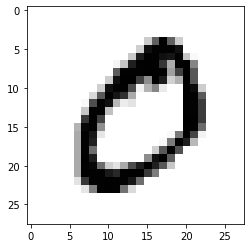

In [37]:
# Let’s display the 10th digit in this rank-3 tensor
# experiment by changing the digit number

digit = train_images[1]
#print(digit.shape)

# plot the digit
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [38]:
train_labels[1]

0

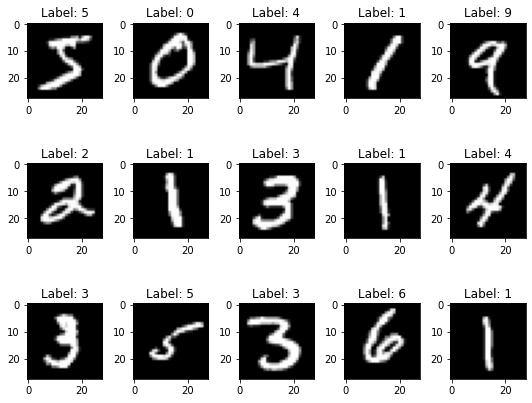

In [39]:
# NOTE: you can change the selection by slicing the dataset as desired
num = 15
images = train_images[:num]     #select 15 samples with their labels
labels = train_labels[:num]

num_row = 3
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let’s explore the test data.

In [40]:
print("test_images.shape:", test_images.shape)
print("test_labels.shape:", test_labels.shape)

test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [41]:
# Display number of labels
len(test_labels)

10000

In [42]:
# Print output class for the selected training samples
test_labels[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

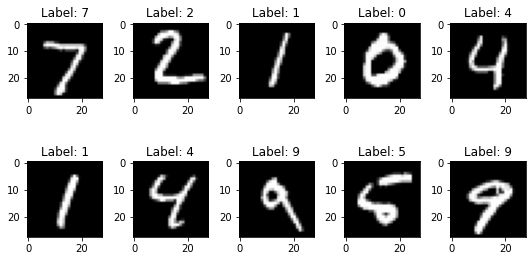

In [43]:
# NOTE: you can change the selection by slicing the dataset as desired
num = 10
images = test_images[:num]
labels = test_labels[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

The above steps help us to visualize the training and test datasets respectively.

## Build the network architecture for a single-layer perceptron (SLP) model

The core building block of neural networks is the layer. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically,layers extract representations from the data fed into them that are hopefully more meaningful for the problem at hand. Most of deep learning consists ofc aining together simple layers that will implement a form of progressive data distillation.

Here, our model consists of a sequence of two* Dense layers*, which are densely connected (also called fully connected) neural layers. The second (and last) layer is a *10-way softmax classification layer*, which means it will return an array of 10 probability scores(summing  to  1).  Each  score  will  be  the  probability  that  the  current  digit  image belongs to one of our 10 digit classes.


In [44]:
# The network architecture for a SLP model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),    
    layers.Dense(10, activation="softmax")
    ])

In [45]:
type(model)

keras.engine.sequential.Sequential

### The compilation step

To make the model ready for training, we need to pick three more things as part of the compilation step:


1. An optimizer — The mechanism through which the model updates itself based on the training data it sees, so as to improve its performance.
2.   A loss function — Used to measure the model's performance on the training data, and thus, how it will be able to steer itself in the right direction.
3. Metrics  to  monitor  during  training  and  testing - in this case we pick `accuracy`, which is the fraction of the images that were correctly classified.

In [46]:
# Compile the model
model.compile(optimizer="rmsprop",              
              loss="sparse_categorical_crossentropy",              
              metrics=["accuracy"])

In [48]:
model.summary()

ValueError: ignored

## Preparing the image data

Before  training,  we’ll  preprocess  the  data  by  reshaping  it  into  the  shape  the  model expects and scaling it so that all values are in the [0,1] interval. Previously, our training images were stored in an array of shape (60000,28,28) of type `uint8` with values in the [0,255] interval. We’ll transform it into a `float32` array of shape (60000,28*28) with values between 0 and 1.

We do also need to categorically encode the labels (so-called "one-hot" encoding).

In [49]:
# Preprocess  the  data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [50]:
print(train_images.dtype)
print(test_images.dtype)
print(train_images.shape)
print(test_images.shape)

float32
float32
(60000, 784)
(10000, 784)


### Training the model

We will now train the model via a call to the model’s fit() method, i.e., we'll fit the model to its training data.

In [51]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
  1/469 [..............................] - ETA: 17s - loss: 2.3133 - accuracy: 0.1172

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


469/469 [==============================] - 7s 14ms/step - loss: 0.2520 - accuracy: 0.9274
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1020 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0381 - accuracy: 0.9887


In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


We can see that we have quickly reach an accuracy of 0.9888 (98.9%) on the training data.

## Use model to make predictions
Now that we have trained the model, we can use it to predict class probabilities for new digits, i.e., images that weren’t part of the training data, like those from the test set.

In [ ]:
# Make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

In [ ]:
np.set_printoptions(suppress=True)
predictions[0]

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.  This  first  test  digit  has  the  highest  probability  score  (0.99999106,  almost  1)  at index 7, so according to our model, it must be a 7. Let's check this out:

In [ ]:
predictions[0].argmax()

In [ ]:
predictions[0][7]

In [ ]:
# Check that the test label agrees:
test_labels[0]

### Evaluating the model on new data

We shall now evaluate the performance of our model at classifying digits it has never seen before by computing average accuracy over the entire test set.

In [ ]:
# Evaluate model accuracy on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

The test-set accuracy turns out to be 98.0% — this is a lower than the accuracy obtained on the training set (98.9%).  This  gap  between  training  accuracy  and  test  accuracy  is  an example  of  overfitting: a phenomenon where machine learning models tend to perform worse on new data than on their training data.

### Other things you can do:

Plot training loss and training accuracy

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, '-go', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, '-bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

In [ ]:
# let's try to take a deeper look at what's going on here
model.summary()

In [ ]:
# We can see the shapes of the tensors that hold the weights. 
# Run the next two lines and write a couple of sentences explaining the output.

ws = model.get_weights()
for i in range(len(ws)):
    print(ws[i].shape)
    
# write your sentence here





In [ ]:
# Now let's look at some of the actual weights. Note that on their own they're pretty meaningless...
print (ws[0][1:8,1:8])

In [ ]:
# Now let's take a look at some images and see how they're being classified.
# Choose an image from the 10,000 test images.

input_image_index = 0
model.evaluate(test_images, test_labels)
predicted_network_output = model.predict(test_images[input_image_index:input_image_index+1, :])
#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)

# take a look at what gets output from the network
predicted_network_output

In [ ]:
# Now let's look for some mis-classified digits.
predictions = model.predict(test_images)
final_predictions = np.argmax(predictions, axis=1)
(incorrects,) = np.nonzero(final_predictions != test_labels)
num = 10
incorrect_indices = incorrects[0:num]
num_row = 2
num_col = 5



In [ ]:
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    incorrect_index = incorrect_indices[i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images_28x28[incorrect_index], cmap='gray')
    ax.set_title('Label: {}\nPred: {}'.format(*[test_labels[incorrect_index], final_predictions[incorrect_index]]))
plt.tight_layout()
plt.show()

If you get to this point and you're happy with everything above, you can start playing around with some different network architectures. Compare the training times and ultimate accuracy of the various architectures.

# Build a Multi-Layer Perceptron model
### Network2
Here our network consists of a sequence of three Dense ("fully-connected") layers. The second layer is called a "hidden" layer and it has 16 units. The third (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

In [ ]:

# Build the second model
network2 = models.Sequential()
network2.add(layers.Dense(16, activation='relu', input_shape=(28 * 28,)))
network2.add(layers.Dense(16, activation='relu'))
network2.add(layers.Dense(10, activation='softmax'))
network2.input_shape

### Compile the MLP model

In [ ]:
network2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
network2.summary()

### Train the MLP model


In [ ]:
from keras.utils import to_categorical
train_labels2 = to_categorical(train_labels)

history2 = network2.fit(train_images, train_labels2, epochs=5, batch_size=128)

### Evaluation of MLP model

In [ ]:
test_labels2 = to_categorical(test_labels)
test_loss, test_acc = network2.evaluate(test_images, test_labels2)

In [ ]:
print('test_acc:', test_acc)

### Plot training loss and training accuracy

In [ ]:
import matplotlib.pyplot as plt

accuracy = history2.history['accuracy']
loss = history2.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, '-go', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, '-bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

### Network3

In [ ]:
network3 = models.Sequential()
network3.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
network3.add(layers.Dense(64, activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

network3.summary()

In [ ]:
history3 = network3.fit(train_images, train_labels2, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = network3.evaluate(test_images, test_labels2)

In [ ]:
print('test_acc:', test_acc)

### Network4

In [ ]:
network4 = models.Sequential()
network4.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
network4.add(layers.Dense(64, activation='relu'))
network4.add(layers.Dense(10, activation='softmax'))

network4.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

network4.summary()

In [ ]:
history4 = network4.fit(train_images, train_labels2, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = network4.evaluate(test_images, test_labels2)

In [ ]:
print('test_acc:', test_acc)

### overfitting example

In [ ]:
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mlp_model.add(layers.Dense(10, activation='softmax'))

mlp_model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

mlp_model.summary()

In [ ]:
history5 = mlp_model.fit(train_images, train_labels2, epochs=2, batch_size=128)

In [ ]:
test_loss, test_acc = mlp_model.evaluate(test_images, test_labels2)

In [ ]:
print('test_acc:', test_acc)

The test set accuracy turns out to be around *97.8%* -- that's a fair bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of "overfitting", a situation in which machine learning models perform worse on new data than on their training data.

### plot training loss and training accuracy

In [ ]:
import matplotlib.pyplot as plt

accuracy = history5.history['accuracy']
loss = history5.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, '-go', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, '-bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

### Display some of the wrong guesses

In [ ]:
# Now let's look for some mis-classified digits.
predictions = mlp_model.predict(test_images)
final_predictions = np.argmax(predictions, axis=1)
(incorrects,) = np.nonzero(final_predictions != test_labels)
num = 10
incorrect_indices = incorrects[0:num]
num_row = 2
num_col = 5

In [ ]:
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    incorrect_index = incorrect_indices[i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images_28x28[incorrect_index], cmap='gray')
    ax.set_title('Label: {}\nPred: {}'.format(*[test_labels[incorrect_index], final_predictions[incorrect_index]]))
plt.tight_layout()
plt.show()  